In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [9]:
data = pd.read_csv('ibmhrdata.csv')

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


dropping the employee count and employee number column because they didn't contain useful information

In [11]:
data = data.drop(['EmployeeCount','EmployeeNumber'],axis=1)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [13]:
travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

data['BusinessTravel'] = data['BusinessTravel'].map(travel_mapping)


In [14]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,2,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,2,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [15]:
reverse_travel_mapping = {
    0: 'Non-Travel',
    1: 'Travel_Rarely',
    2: 'Travel_Frequently'
}


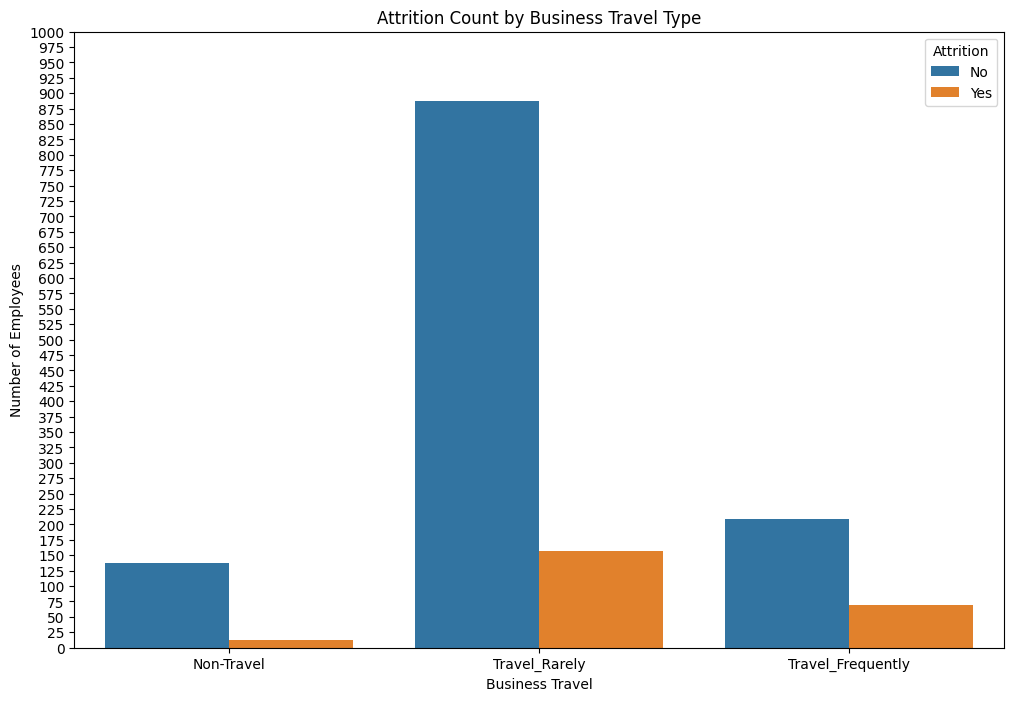

In [16]:
plt.figure(figsize=(12,8))

sns.countplot(x='BusinessTravel', hue='Attrition', data=data)

# replacing x-ticks with original values
plt.xticks(ticks=[0,1,2], labels=[reverse_travel_mapping[i] for i in [0,1,2]])

plt.xlabel('Business Travel')
plt.ylabel('Number of Employees')
plt.title('Attrition Count by Business Travel Type')

plt.yticks(np.arange(0,1001,25))

# now looking good 
plt.show()

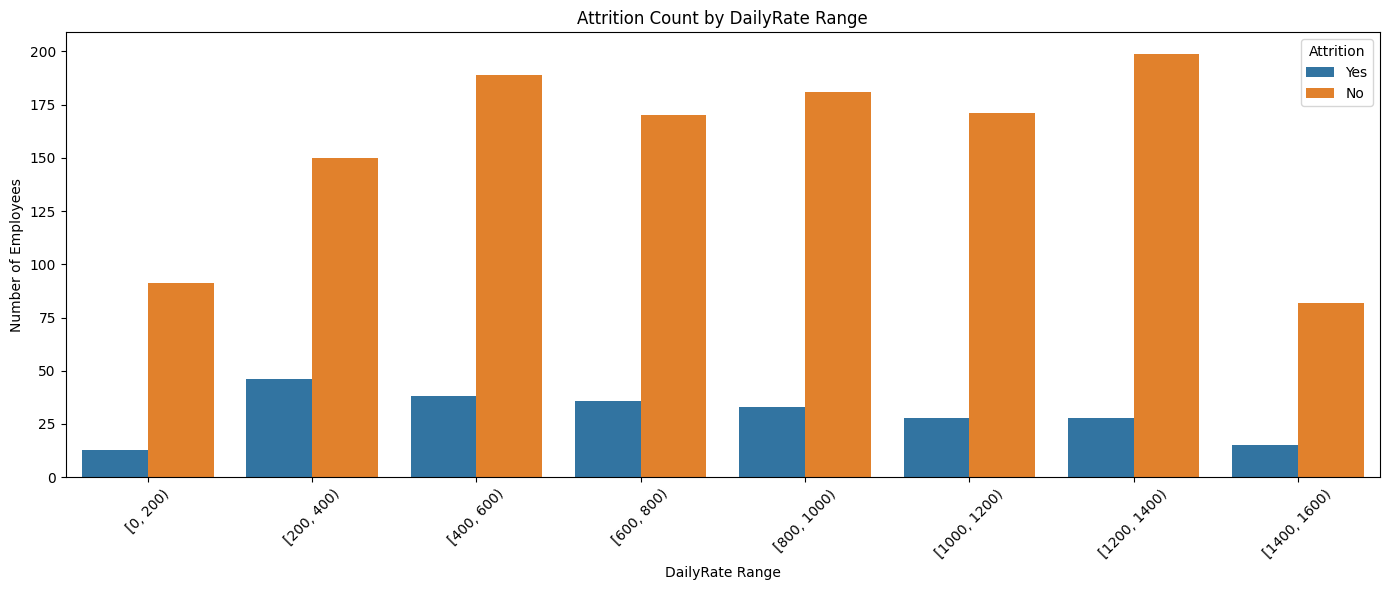

In [17]:
values = data['DailyRate']

# Define bin width
bin_width = 200

# Define bins from minimum rounded down to nearest 200, to max rounded up to nearest 200
min_val = int(np.floor(values.min() / bin_width) * bin_width)
max_val = int(np.ceil(values.max() / bin_width) * bin_width)

bins = list(range(min_val, max_val + bin_width, bin_width))

# Create a new binned column
# right is false means intervals are left closed and right open
data['DailyRate_binned'] = pd.cut(data['DailyRate'], bins=bins, right=False)

# Plotting
plt.figure(figsize=(14,6))
sns.countplot(data=data, x='DailyRate_binned', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition Count by DailyRate Range')
plt.xlabel('DailyRate Range')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

In [18]:
dept_mapping = {
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
}

reverse_dept_mapping = {
    0: 'Sales',
    1: 'Research & Development',
    2: 'Human Resources'
}

# Apply the mapping
data['Department'] = data['Department'].map(dept_mapping)

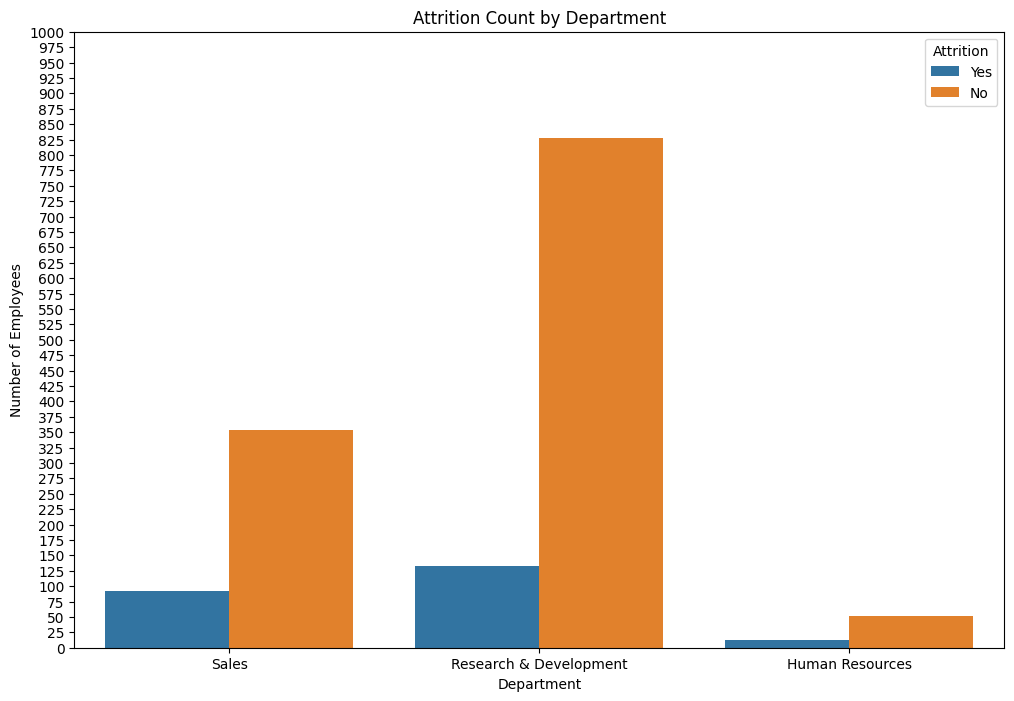

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Department', hue='Attrition', data=data)

# Replace x-ticks with original string labels
plt.xticks(ticks=[0, 1, 2], labels=[reverse_dept_mapping[i] for i in [0, 1, 2]])

plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Attrition Count by Department')

# Custom y-axis scale
plt.yticks(np.arange(0, 1001, 25))

plt.show()

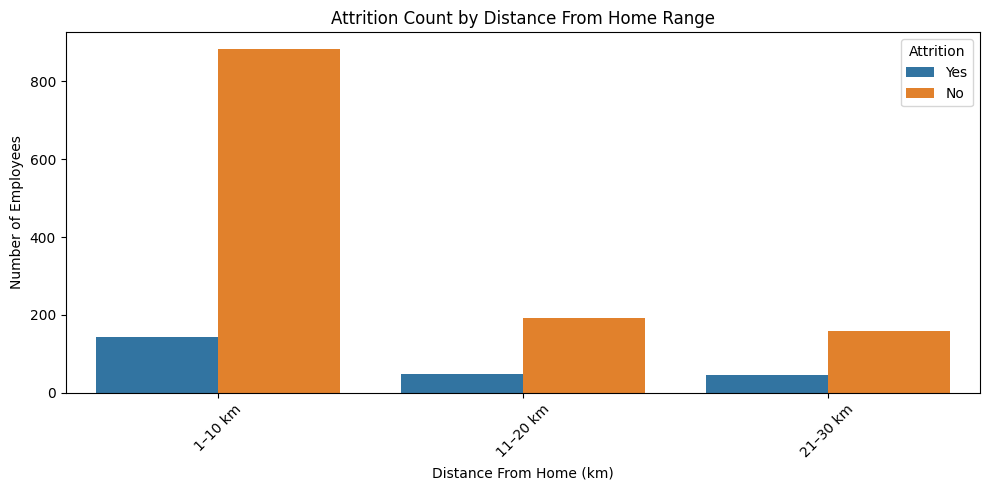

In [20]:
values = data['DistanceFromHome']

# Define bin width and ensure the last bin includes the max value
bin_width = 10
min_val = 1
max_val = values.max()  # no rounding yet

# Define bins manually to ensure full coverage, especially the last one
bins = [1, 11, 21, 31]  # This covers 1–10, 11–20, 21–30

# Custom labels
labels = ['1–10 km', '11–20 km', '21–30 km']

# Use right=True to make the last value (e.g., 29) included in 21–30
data_temp = data.copy()
data_temp['DistanceBin'] = pd.cut(data_temp['DistanceFromHome'], bins=bins, right=False, labels=labels, include_lowest=True)

# Plotting
plt.figure(figsize=(10,5))
sns.countplot(data=data_temp, x='DistanceBin', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition Count by Distance From Home Range')
plt.xlabel('Distance From Home (km)')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

enough data visualization is done now work on the model and all
before that change the education section to numerical values and gender section to numerical values
there are some columns left which i didn't watched work on them

In [21]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate_binned
0,41,Yes,1,1102,0,1,2,Life Sciences,2,Female,...,80,0,8,0,1,6,4,0,5,"[1000, 1200)"
1,49,No,2,279,1,8,1,Life Sciences,3,Male,...,80,1,10,3,3,10,7,1,7,"[200, 400)"
2,37,Yes,1,1373,1,2,2,Other,4,Male,...,80,0,7,3,3,0,0,0,0,"[1200, 1400)"
3,33,No,2,1392,1,3,4,Life Sciences,4,Female,...,80,0,8,3,3,8,7,3,0,"[1200, 1400)"
4,27,No,1,591,1,2,1,Medical,1,Male,...,80,1,6,3,3,2,2,2,2,"[400, 600)"


In [22]:
gender_mapping = {
    'Male': 0,
    'Female': 1,
}
# Apply the mapping
data['Gender'] = data['Gender'].map(gender_mapping)

In [23]:
data.replace({'Attrition':{'Yes':1,'No':0}},inplace=True)

C:\Users\Yogiraj\AppData\Local\Temp\ipykernel_19452\3813189047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Attrition':{'Yes':1,'No':0}},inplace=True)


In [24]:
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())
print(data['OverTime'].unique())
print(data['Over18'].unique())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']
['Y']


In [25]:
data.replace({'OverTime':{'Yes':1,'No':0}},inplace=True)
data.replace({'MaritalStatus':{'Single':0,'Married':1,'Divorced':2}},inplace=True)

C:\Users\Yogiraj\AppData\Local\Temp\ipykernel_19452\3654467589.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'OverTime':{'Yes':1,'No':0}},inplace=True)
C:\Users\Yogiraj\AppData\Local\Temp\ipykernel_19452\3654467589.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'MaritalStatus':{'Single':0,'Married':1,'Divorced':2}},inplace=True)


In [26]:
data = data.drop(['JobRole'],axis=1)

In [27]:
print(data.dtypes)
data.head()

Age                            int64
Attrition                      int64
BusinessTravel                 int64
DailyRate                      int64
Department                     int64
DistanceFromHome               int64
Education                      int64
EducationField                object
EnvironmentSatisfaction        int64
Gender                         int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobSatisfaction                int64
MaritalStatus                  int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                       int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate_binned
0,41,1,1,1102,0,1,2,Life Sciences,2,1,...,80,0,8,0,1,6,4,0,5,"[1000, 1200)"
1,49,0,2,279,1,8,1,Life Sciences,3,0,...,80,1,10,3,3,10,7,1,7,"[200, 400)"
2,37,1,1,1373,1,2,2,Other,4,0,...,80,0,7,3,3,0,0,0,0,"[1200, 1400)"
3,33,0,2,1392,1,3,4,Life Sciences,4,1,...,80,0,8,3,3,8,7,3,0,"[1200, 1400)"
4,27,0,1,591,1,2,1,Medical,1,0,...,80,1,6,3,3,2,2,2,2,"[400, 600)"


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
X = data.drop(columns = ['Attrition','Education','EducationField','DailyRate_binned','Over18'])
Y = data['Attrition']

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

C:\Users\Yogiraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print(" Accuracy of the training data : ",training_data_accuracy)

 Accuracy of the training data :  0.8469387755102041


In [34]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print(" Accuracy of the testing data : ",testing_data_accuracy)

 Accuracy of the testing data :  0.8469387755102041


now working on hyperparameters tunning to work on the efficiency
for that first i am importing the grid search CV 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01,0.1,1,10],
        'solver':['lbfgs','liblinear','sag','newton-cg'],
        'max_iter': [100,500,1000]
    },
    {
        'penalty': ['l1'],
        'C': [0.01,0.1,1,10],
        'solver': ['liblinear','saga'],
        'max_iter': [100,500,1000]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01,1,10],
        'solver': ['saga'],
        'l1_ratio': [0.2,0.5,0.8],
        'max_iter': [500,1000]
    },
    {
        'penalty': [None],
        'solver': ['lbfgs','saga'],
        'max_iter': [100,500]
    }
]

In [37]:
clf = GridSearchCV(model, param_grid=param_grid , cv=3, verbose=True,n_jobs=-1)

In [38]:
best_clf = clf.fit(X_train,Y_train)
print(best_clf.best_params_)

Fitting 3 folds for each of 94 candidates, totalling 282 fits
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [39]:
best_clf.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [41]:
print(f'Accuracy after trying all possible combinations of grid search CV is- : {best_clf.score(X_train,Y_train):.3f}')

Accuracy after trying all possible combinations of grid search CV is- : 0.884


now trying some Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)


best_clf = clf.fit(X_train_scaled, Y_train)


print(best_clf.best_params_)
print(best_clf.best_estimator_)


score = best_clf.score(X_test_scaled,Y_test)
print("Test accuracy:", score)

Fitting 3 folds for each of 94 candidates, totalling 282 fits
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.1)
Test accuracy: 0.8707482993197279


Using more evaluation metrics for better understanding 

In [44]:
y_test_proba = best_clf.predict_proba(X_test_scaled)[:,1] #  probabilities for class 1 (Attrition = 1)
y_pred = best_clf.predict(X_test_scaled)

In [45]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


confusion matrix 

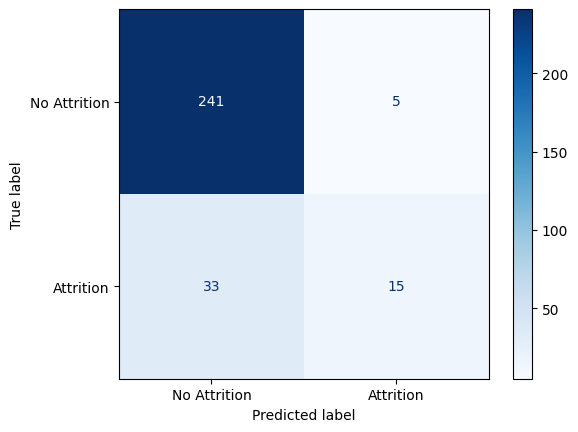

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['No Attrition','Attrition'])
disp.plot(cmap='Blues')

Classification Report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred,target_names=['No Attrition', 'Attrition']))

              precision    recall  f1-score   support

No Attrition       0.88      0.98      0.93       246
   Attrition       0.75      0.31      0.44        48

    accuracy                           0.87       294
   macro avg       0.81      0.65      0.68       294
weighted avg       0.86      0.87      0.85       294



ROC - AUC SCORE AND CURVE

ROC AUC Score: 0.8156334688346883


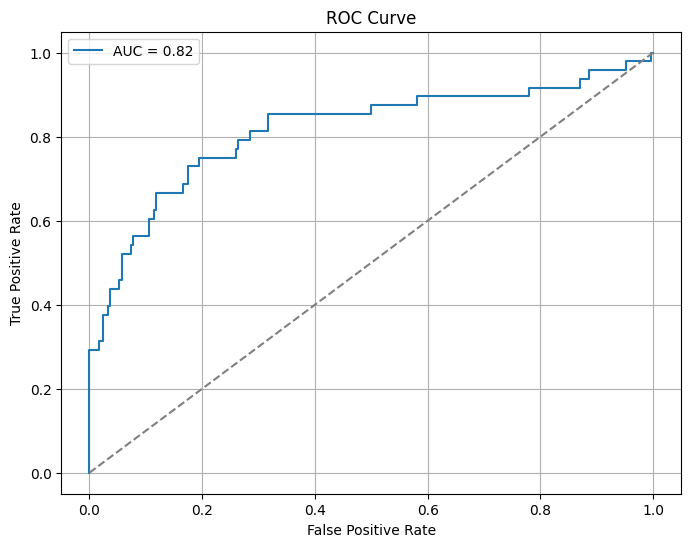

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#AUC Score
auc = roc_auc_score(Y_test, y_test_proba)
print("ROC AUC Score:", auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [49]:
# assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.16568550426836023


summary table of metrics 

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(Y_test,y_pred))
print("Recall:", recall_score(Y_test,y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))

Precision: 0.75
Recall: 0.3125
F1 Score: 0.4411764705882353
